In [18]:
import pandas as pd
import numpy as np
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [19]:
laser_data = pd.read_csv("laser cut.csv") 
#del laserdata['latitude']
laserdata=laser_data.drop(['entry_id','latitude','longitude','elevation','status'],axis=1)
laserdata.columns=['time','Ultrasonic_sensor','loudness_sensor']
laserdata.describe()

,Ultrasonic_sensor,loudness_sensor
count,1447.000000,1447.000000
mean,38.217692,79.159641
std,1.945742,28.915005
min,5.000000,0.000000
25%,38.000000,64.000000
50%,38.000000,75.000000
75%,39.000000,94.000000
max,71.000000,368.000000


In [20]:
ultravalue=laserdata[(laserdata['Ultrasonic_sensor']<33) | (laserdata['Ultrasonic_sensor']>40)]
laserdata.drop(ultravalue.index,inplace=True,axis=0)
laserdata1=laserdata.replace(40,39).replace(33,34)
#sns.lmplot(x='time',y='Ultrasonic_sensor',data=laserdata1,fit_reg=False)
#plt.show()
laserdata1

,time,Ultrasonic_sensor,loudness_sensor
0,2019-10-22 09:23:00 UTC,38,67
1,2019-10-22 09:23:29 UTC,39,82
2,2019-10-22 09:23:44 UTC,39,75
3,2019-10-22 09:23:59 UTC,39,68
4,2019-10-22 09:24:14 UTC,38,69
...,...,...,...
1442,2019-10-22 16:23:36 UTC,39,76
1443,2019-10-22 16:23:51 UTC,38,86
1444,2019-10-22 16:24:06 UTC,38,51
1445,2019-10-22 16:24:22 UTC,38,36


In [21]:
loudvalue1=laserdata[(laserdata['loudness_sensor']>150)| (laserdata['loudness_sensor']<40)]
laserdata1.drop(loudvalue1.index,inplace=True,axis=0)
laserdata1

,time,Ultrasonic_sensor,loudness_sensor
0,2019-10-22 09:23:00 UTC,38,67
1,2019-10-22 09:23:29 UTC,39,82
2,2019-10-22 09:23:44 UTC,39,75
3,2019-10-22 09:23:59 UTC,39,68
4,2019-10-22 09:24:14 UTC,38,69
...,...,...,...
1440,2019-10-22 16:23:06 UTC,38,50
1442,2019-10-22 16:23:36 UTC,39,76
1443,2019-10-22 16:23:51 UTC,38,86
1444,2019-10-22 16:24:06 UTC,38,51


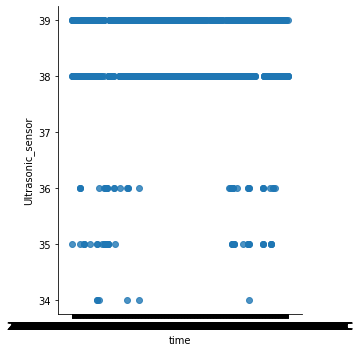

In [22]:
sns.lmplot(x='time',y='Ultrasonic_sensor',data=laserdata1,fit_reg=False)
plt.show()

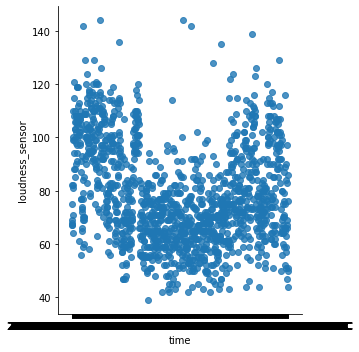

In [23]:
sns.lmplot(x='time',y='loudness_sensor',data=laserdata1,fit_reg=False)
plt.show()

In [24]:
laserdata.index = range(len(laserdata))
laserdata

,time,Ultrasonic_sensor,loudness_sensor
0,2019-10-22 09:23:00 UTC,38,67
1,2019-10-22 09:23:29 UTC,39,82
2,2019-10-22 09:23:44 UTC,39,75
3,2019-10-22 09:23:59 UTC,39,68
4,2019-10-22 09:24:14 UTC,38,69
...,...,...,...
1434,2019-10-22 16:23:36 UTC,39,76
1435,2019-10-22 16:23:51 UTC,38,86
1436,2019-10-22 16:24:06 UTC,38,51
1437,2019-10-22 16:24:22 UTC,38,36


In [25]:
laserdata1['time'] = laserdata1['time'].map(lambda x: str(x)[:-2])
laserdata1

,time,Ultrasonic_sensor,loudness_sensor
0,2019-10-22 09:23:00 U,38,67
1,2019-10-22 09:23:29 U,39,82
2,2019-10-22 09:23:44 U,39,75
3,2019-10-22 09:23:59 U,39,68
4,2019-10-22 09:24:14 U,38,69
...,...,...,...
1440,2019-10-22 16:23:06 U,38,50
1442,2019-10-22 16:23:36 U,39,76
1443,2019-10-22 16:23:51 U,38,86
1444,2019-10-22 16:24:06 U,38,51


In [26]:
laserdata1['time']=laserdata1['time'].map(lambda x: str(x)[2:])
laserdata1

,time,Ultrasonic_sensor,loudness_sensor
0,19-10-22 09:23:00 U,38,67
1,19-10-22 09:23:29 U,39,82
2,19-10-22 09:23:44 U,39,75
3,19-10-22 09:23:59 U,39,68
4,19-10-22 09:24:14 U,38,69
...,...,...,...
1440,19-10-22 16:23:06 U,38,50
1442,19-10-22 16:23:36 U,39,76
1443,19-10-22 16:23:51 U,38,86
1444,19-10-22 16:24:06 U,38,51


In [27]:
laserdata1['time']=laserdata1['time'].map(lambda x:str(x)[1:])
laserdata1

,time,Ultrasonic_sensor,loudness_sensor
0,9-10-22 09:23:00 U,38,67
1,9-10-22 09:23:29 U,39,82
2,9-10-22 09:23:44 U,39,75
3,9-10-22 09:23:59 U,39,68
4,9-10-22 09:24:14 U,38,69
...,...,...,...
1440,9-10-22 16:23:06 U,38,50
1442,9-10-22 16:23:36 U,39,76
1443,9-10-22 16:23:51 U,38,86
1444,9-10-22 16:24:06 U,38,51


In [28]:
#laserdata1['time'] = laserdata1['time'].dt.ceil('min').dt.time
#laserdata1['time1'] = laserdata1['time'].dt.min
#laserdata1.dtypes
#df['time'] = df['datetime'].dt.ceil('min').dt.time

In [29]:
laserdata1[(laserdata1['loudness_sensor']>100 )& (laserdata1['Ultrasonic_sensor']>33)]

,time,Ultrasonic_sensor,loudness_sensor
13,9-10-22 09:28:42 U,39,110
16,9-10-22 09:29:27 U,38,108
17,9-10-22 09:29:42 U,39,115
18,9-10-22 09:29:57 U,38,121
20,9-10-22 09:30:27 U,39,103
...,...,...,...
1382,9-10-22 16:06:47 U,38,112
1388,9-10-22 16:08:18 U,39,102
1389,9-10-22 16:08:33 U,38,107
1394,9-10-22 16:10:03 U,38,101


In [30]:
laserdata1[(laserdata1['loudness_sensor']<80 )& (laserdata1['Ultrasonic_sensor']>33)]

,time,Ultrasonic_sensor,loudness_sensor
0,9-10-22 09:23:00 U,38,67
2,9-10-22 09:23:44 U,39,75
3,9-10-22 09:23:59 U,39,68
4,9-10-22 09:24:14 U,38,69
5,9-10-22 09:24:29 U,35,67
...,...,...,...
1439,9-10-22 16:22:51 U,38,67
1440,9-10-22 16:23:06 U,38,50
1442,9-10-22 16:23:36 U,39,76
1444,9-10-22 16:24:06 U,38,51


In [31]:
episode1=laserdata1.iloc[1300:1365]
episode1

,time,Ultrasonic_sensor,loudness_sensor
1374,9-10-22 16:04:32 U,38,85
1375,9-10-22 16:04:47 U,38,107
1376,9-10-22 16:05:02 U,39,92
1377,9-10-22 16:05:17 U,38,96
1378,9-10-22 16:05:32 U,38,88
...,...,...,...
1438,9-10-22 16:22:36 U,38,47
1439,9-10-22 16:22:51 U,38,67
1440,9-10-22 16:23:06 U,38,50
1442,9-10-22 16:23:36 U,39,76


//anaconda3/lib/python3.7/site-packages/dateutil/parser/_parser.py:1206: UnknownTimezoneWarning: tzname U identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


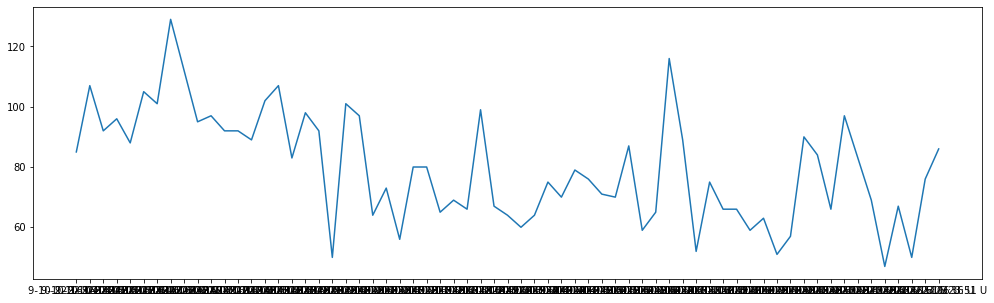

In [32]:
#figsize:指定figure的宽和高，单位为英寸
#plt.plot( 'time', 'loudness_sensor', data=episode1)
#plt.show()
fig = plt.figure(figsize=(17, 5))
ax = fig.add_subplot(1,1,1)
ax.plot('time', 'loudness_sensor', data=episode1)
plt.show()

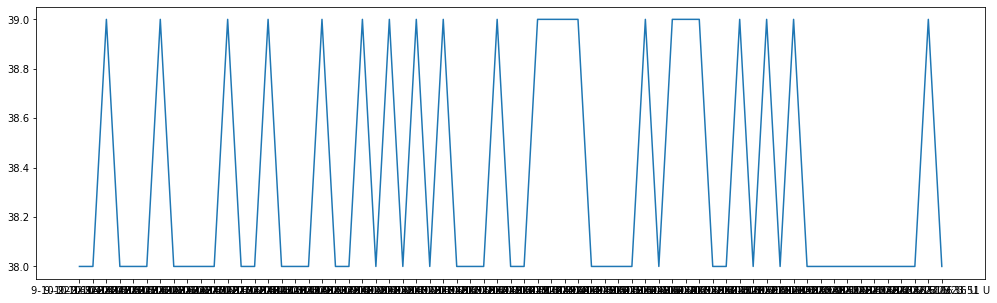

In [33]:
fig = plt.figure(figsize=(17, 5))
ax = fig.add_subplot(1,1,1)
ax.plot('time','Ultrasonic_sensor',data=episode1)
plt.savefig('./test2.jpg')
plt.show()